In [283]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [284]:
import numpy as np
import pandas as pd
#import datetime as dt
from datetime import datetime

## Reflect Tables into SQLALchemy ORM

In [285]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [286]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [287]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

# reflect the tables

In [288]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [289]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [290]:
# Create our session (link) from Python to the DB
session = Session(engine)

## Bonus Challenge Assignment: Temperature Analysis II

In [376]:
start_date1 = datetime.strptime(input('Enter Start date in the format yyyy-mm-dd'), '%Y-%m-%d')

Enter Start date in the format yyyy-mm-dd2016-08-01


In [377]:
end_date1 = datetime.strptime(input('Enter End date in the format yyyy-mm-dd'), '%Y-%m-%d')

Enter End date in the format yyyy-mm-dd2017-08-01


In [378]:
start_date1

datetime.datetime(2016, 8, 1, 0, 0)

In [379]:
end_date1

datetime.datetime(2017, 8, 1, 0, 0)

In [380]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, maximum, and average temperatures for that range of dates

def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# For example
#print(calc_temps('2012-02-28', '2012-03-05'))
Results = (calc_temps(start_date1, end_date1))

In [381]:
Results

[(58.0, 74.63887670030715, 87.0)]

In [382]:
Results[0][1]

74.63887670030715

In [383]:

x_pos = ['a']
y_pos = [Results[0][1]]
error = (Results[0][2]-Results[0][0])



### Daily Rainfall Average

In [384]:
dict = {'c':'a','AvgTemp': y_pos}

In [385]:
new = pd.DataFrame(dict)

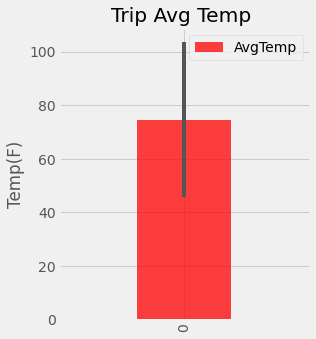

In [386]:

new.plot(kind="bar", facecolor = "red", yerr = error, width = .3, alpha=0.75, align="center", figsize=(4,5), title = "Trip Avg Temp ", ylabel="Temp(F)")     
plt.show()

In [387]:
inspector = inspect(engine)
#inspector.get_table_names()
columns = inspector.get_columns('Station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [388]:
columns = inspector.get_columns('Measurement')
for c in columns:
    print(c['name'], c["type"])


id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [389]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's 
# matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
sel = [Measurement.station, Measurement.prcp, Station.name, Station.latitude, Station.longitude, Station.elevation]
same_sporder = session.query(*sel).filter(Measurement.station == Station.station).\
filter(Measurement.date >= start_date1).filter(Measurement.date <= end_date1).\
order_by(Measurement.prcp).all()


### Daily Temperature Normals

In [391]:
for record in same_sporder:
    (Mea_st, Mea_prcp, St_name, St_lat, St_long, St_elev) = record
    print(
        f" rain '{Mea_st}'|'{Mea_prcp}'|'{ St_name}'|'{St_lat}'|'{St_long}'|'{St_elev}'")
        

 rain 'USC00519397'|'None'|'WAIKIKI 717.2, HI US'|'21.2716'|'-157.8168'|'3.0'
 rain 'USC00519397'|'None'|'WAIKIKI 717.2, HI US'|'21.2716'|'-157.8168'|'3.0'
 rain 'USC00514830'|'None'|'KUALOA RANCH HEADQUARTERS 886.9, HI US'|'21.5213'|'-157.8374'|'7.0'
 rain 'USC00514830'|'None'|'KUALOA RANCH HEADQUARTERS 886.9, HI US'|'21.5213'|'-157.8374'|'7.0'
 rain 'USC00514830'|'None'|'KUALOA RANCH HEADQUARTERS 886.9, HI US'|'21.5213'|'-157.8374'|'7.0'
 rain 'USC00514830'|'None'|'KUALOA RANCH HEADQUARTERS 886.9, HI US'|'21.5213'|'-157.8374'|'7.0'
 rain 'USC00514830'|'None'|'KUALOA RANCH HEADQUARTERS 886.9, HI US'|'21.5213'|'-157.8374'|'7.0'
 rain 'USC00514830'|'None'|'KUALOA RANCH HEADQUARTERS 886.9, HI US'|'21.5213'|'-157.8374'|'7.0'
 rain 'USC00514830'|'None'|'KUALOA RANCH HEADQUARTERS 886.9, HI US'|'21.5213'|'-157.8374'|'7.0'
 rain 'USC00514830'|'None'|'KUALOA RANCH HEADQUARTERS 886.9, HI US'|'21.5213'|'-157.8374'|'7.0'
 rain 'USC00514830'|'None'|'KUALOA RANCH HEADQUARTERS 886.9, HI US'|'21.5213

In [392]:
# Use this function to calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()

# For example
#daily_normals("01-01")

In [393]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date = '2018-08-01'
end_date = '2018-08-07'

# Use the start and end date to create a range of dates
#t = np.arange((start_date), (end_date)).astype(datetime)
t = np.arange(np.datetime64(start_date), np.datetime64(end_date))
# Strip off the year and save a list of strings in the format %m-%d


# Use the `daily_normals` function to calculate the normals for each date string 
# and append the results to a list called `normals`.


In [394]:
t

array(['2018-08-01', '2018-08-02', '2018-08-03', '2018-08-04',
       '2018-08-05', '2018-08-06'], dtype='datetime64[D]')

In [395]:
x = len(t)

In [396]:
datesNP = []
Normals = []

In [397]:
for i in range(0,x):
    datesNP.append(t[i])
    Dates = t[i]
    dd = Dates.item()
    dd2 = datetime.strftime(dd,'%m-%d')
    Normal = daily_normals(dd2)
    Normals.append(Normal)
   

In [398]:
Normals

[[(67.0, 75.54, 83.0)],
 [(68.0, 75.60377358490567, 84.0)],
 [(70.0, 76.61111111111111, 85.0)],
 [(69.0, 76.71153846153847, 84.0)],
 [(69.0, 76.14814814814815, 82.0)],
 [(67.0, 76.25, 83.0)]]

In [399]:
Normals[1][0][2]

84.0

In [400]:
list = []
list2 = []
list3 = []
for i in range (0,x):
    list.append(Normals[i][0][0])
    list2.append(Normals[i][0][1])
    list3.append(Normals[i][0][2])

In [401]:
list

[67.0, 68.0, 70.0, 69.0, 69.0, 67.0]

In [402]:
list2

[75.54,
 75.60377358490567,
 76.61111111111111,
 76.71153846153847,
 76.14814814814815,
 76.25]

In [403]:
list3

[83.0, 84.0, 85.0, 84.0, 82.0, 83.0]

In [404]:
dict = {}

In [405]:
dict["min"] = list

In [406]:
dict["ave"] = list2

In [407]:
dict["max"] = list3

In [408]:
#dict["dates"] = datesNP

In [409]:
frame = pd.DataFrame(dict, index = datesNP)


In [410]:
frame.head()

,min,ave,max
2018-08-01,67.0,75.540000,83.0
2018-08-02,68.0,75.603774,84.0
2018-08-03,70.0,76.611111,85.0
2018-08-04,69.0,76.711538,84.0
2018-08-05,69.0,76.148148,82.0


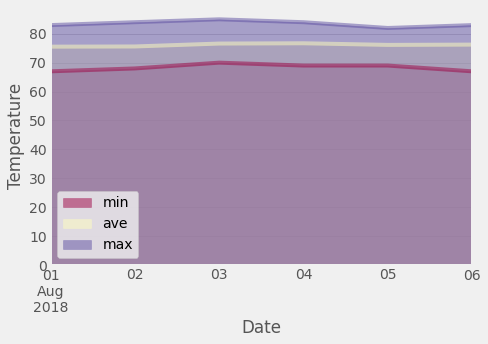

In [411]:

frame.plot(kind='area', stacked=False, alpha=0.5, colormap='Spectral',figsize=(7, 5))
        
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.tight_layout()
plt.show()

In [412]:
session.close()